In [1]:
# imported nana tanan ayaw na pag import pisti yawa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
#3 data exploration

file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

#info
summary_info = data[['main.aqi', 'components.co',  'components.no', 'components.o3', 'components.so2','components.pm2_5', 'components.pm10', 'components.nh3', 'city_name']].info()

#describe
summary_stats = data[['main.aqi', 'components.co',  'components.no', 'components.o3', 'components.so2','components.pm2_5', 'components.pm10', 'components.nh3', 'city_name']].describe()

print(summary_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34219 entries, 0 to 34218
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   main.aqi          34219 non-null  float64
 1   components.co     34219 non-null  float64
 2   components.no     34219 non-null  float64
 3   components.o3     34219 non-null  float64
 4   components.so2    34219 non-null  float64
 5   components.pm2_5  34219 non-null  float64
 6   components.pm10   34219 non-null  float64
 7   components.nh3    34219 non-null  float64
 8   city_name         34219 non-null  object 
dtypes: float64(8), object(1)
memory usage: 2.3+ MB
           main.aqi  components.co  components.no  components.o3  \
count  34219.000000   34219.000000   34219.000000   34219.000000   
mean       1.637394     489.998768       1.238858      28.759228   
std        1.026660     443.169741       6.219306      27.765025   
min        1.000000     136.850000       0.000000  

In [4]:
from scipy import stats


file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

# columns for analysis
numerical_columns = ['main.aqi', 'components.co', 'components.no', 'components.o3',
                     'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']


statistics_numpy = {}

# basic descriptive statistics
for column in numerical_columns:
    column_data = data[column].dropna()
    stats_dict = {
        'mean': np.mean(column_data),
        'median': np.median(column_data),
        'mode': stats.mode(column_data),
        'std_dev': np.std(column_data, ddof=1),
        'variance': np.var(column_data, ddof=1),
        'min': np.min(column_data),
        'max': np.max(column_data),
        'range': np.ptp(column_data),
        '25th_percentile': np.percentile(column_data, 25),
        '50th_percentile': np.percentile(column_data, 50),
        '75th_percentile': np.percentile(column_data, 75)
    }
    statistics_numpy[column] = stats_dict

# better viewing
statistics_numpy_df = pd.DataFrame(statistics_numpy).T


print(statistics_numpy_df)

                        mean  median           mode     std_dev  \
main.aqi            1.637394     1.0   (1.0, 21471)     1.02666   
components.co     489.998768  333.79  (267.03, 788)  443.169741   
components.no       1.238858    0.05    (0.0, 8421)    6.219306   
components.o3      28.759228   23.25     (0.0, 744)   27.765025   
components.so2      4.233641    1.42    (0.24, 277)    7.946603   
components.pm2_5   14.707393    5.59     (0.5, 310)   25.309414   
components.pm10    17.830166    7.28     (2.15, 60)    29.79942   
components.nh3      4.416526    1.95     (0.0, 787)    6.533856   

                       variance     min      max   range 25th_percentile  \
main.aqi                1.05403     1.0      5.0     4.0             1.0   
components.co     196399.419776  136.85  5126.95  4990.1          273.71   
components.no         38.679773     0.0   126.96  126.96            0.01   
components.o3        770.896618     0.0   343.32  343.32            11.8   
components.so2  

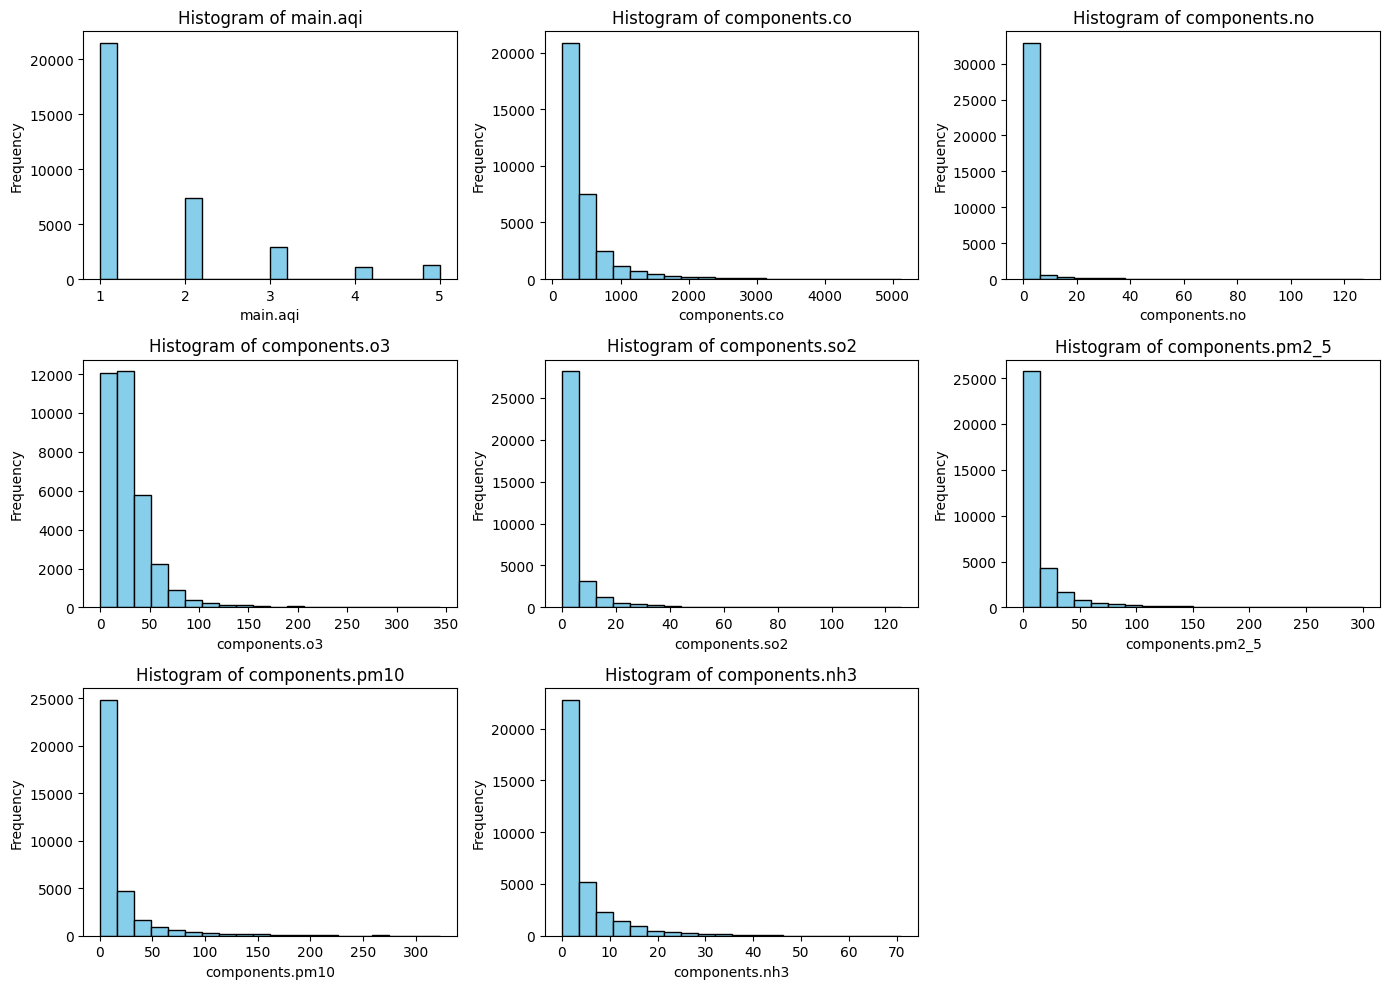

In [6]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i) 
    plt.hist(data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

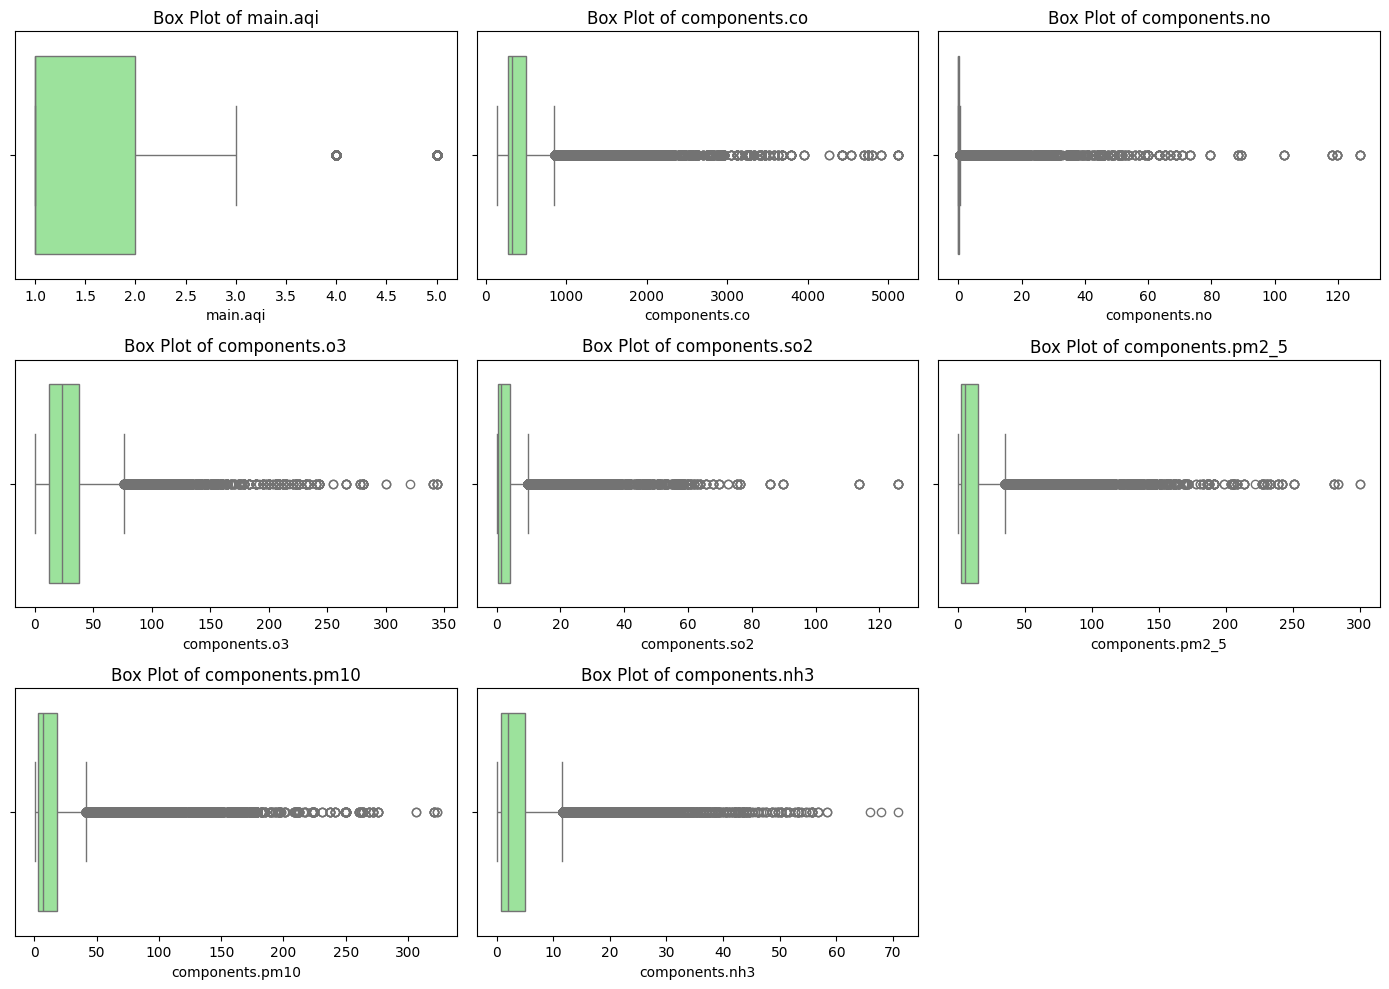

In [7]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column].dropna(), color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()